In [29]:
import numpy as np
from numpy.typing import NDArray
from clustering import K_Means


# define random clustered data creation
def make_clustered_blobs(num_clusters: int, points_per_cluster:int=50, radius=0.25) -> NDArray:
    cluster_centers = np.random.rand(num_clusters, 2)
    vectors = np.zeros((num_clusters * points_per_cluster, 2))
    for i in range(num_clusters):
        r = radius * np.random.rand(points_per_cluster)
        theta = 2 * np.pi * np.random.rand(points_per_cluster)
        x = cluster_centers[i,0] + r * np.cos(theta)
        y = cluster_centers[i,1] + r * np.sin(theta)
        points = np.vstack((x, y)).T
        start = i * points_per_cluster
        end = (i+1) * points_per_cluster
        # print(start, end, points.shape)
        vectors[start:end, :] = points
    return vectors

(100, 2)
0	 0.2382 [[0.12929669 1.13905342]
 [0.3411778  0.52044617]]
1	 0.0393 [[0.11006509 0.96648593]
 [0.25832403 0.2291501 ]]
2	 0.0000 [[0.12361596 0.94963747]
 [0.25959905 0.17226498]]
[[0.12361596 0.94963747]
 [0.25959905 0.17226498]]


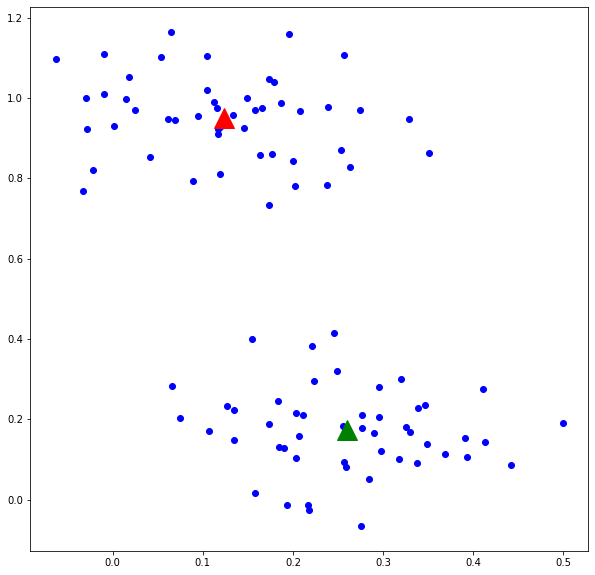

In [31]:
num_clusters = 2

vectors = make_clustered_blobs(num_clusters=num_clusters)
print(vectors.shape)
k_means = K_Means(vectors, 
                  num_clusters=num_clusters)

k_means.fit()
cluster_centers = k_means.get_cluster_centers()
print(cluster_centers)

# plot|
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
# make scatter plot of all data points
plt.scatter(vectors[:,0], vectors[:,1], marker='o', c='blue')
# plot the centers
plt.plot(cluster_centers[0,0], cluster_centers[0,1], 'r^', markersize=20)
plt.plot(cluster_centers[1,0], cluster_centers[1,1], 'g^', markersize=20)
plt.show()

